In [31]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import keras 
import os 
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets
from matplotlib import rc 
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

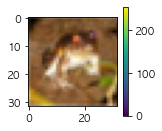

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)              

In [89]:
seed  = 0
np.random.seed(seed)
tf.random.set_seed(seed)

cifar_mnist = datasets.cifar10
(train_images , train_labels) , (test_images , test_labels) = cifar_mnist.load_data()

class_names = ["Airplane" , "Car" , "Birs" , "Cat" , "Deer" , "Dog" , "Frog" , "Hores" ,"ship" , "Truck"]

# 그림 뭔지 확인
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# 흑백 이미지가 아니라 컬러 이미지라 1이 아니라 3으로 해주어야 함 
train_images = train_images.reshape(train_images.shape[0] , 32 , 32 , 3).astype("float32") / 255.0
test_images = test_images.reshape(test_images.shape[0] , 32 , 32 , 3).astype("float32") / 255.0


model = Sequential()
model.add(Conv2D(32 , kernel_size = (3 , 3) , input_shape = (32 , 32 , 3) , activation = "relu"))
model.add(Conv2D(64 , (3 , 3) , activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128 , activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10 , activation = "softmax"))
model.summary()

model.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

Model_dir = "./model_animal/"
if not os.path.exists(Model_dir):
    os.mkdir(Model_dir)

modelpath = "./model_animal/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath = modelpath , monitor = "val_loss" , verbose = 1 , save_best_only = True)
earlystop = EarlyStopping(monitor = "val_loss" , patience = 10 )
history = model.fit(train_images , train_labels , epochs = 10 , verbose = 1)

test_loss , test_acc = model.evaluate(test_images , test_labels , verbose = 2)

print("테스트 정확도 : " , test_acc)
predictions = model.predict(test_images)
print(predictions[0])
np.argmax(predictions[0])
print(test_labels[0])

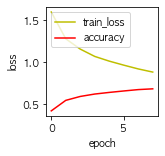

In [90]:
plt.plot(hitstory.history["loss"] , "y" , label = "train_loss")
plt.plot(hitstory.history["accuracy"] , "r" , label = "accuracy")

# plt.ylim([0 , 0 , 2.5])

plt.xlabel("epoch")
plt.ylabel("loss")

plt.legend(loc = "upper left")
plt.show()

# history.history

예측 : Cat/ 정답 : Airplane


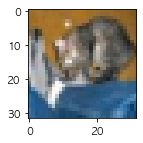

예측 : Car/ 정답 : Airplane


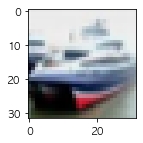

예측 : ship/ 정답 : Airplane


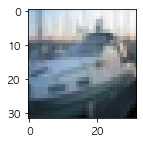

예측 : Airplane/ 정답 : Airplane


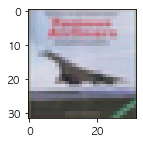

예측 : Frog/ 정답 : Airplane


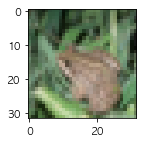

예측 : Frog/ 정답 : Airplane


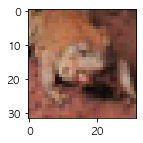

예측 : Car/ 정답 : Airplane


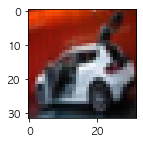

예측 : Frog/ 정답 : Airplane


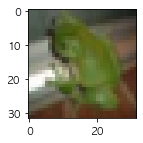

예측 : Cat/ 정답 : Airplane


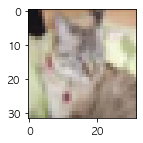

예측 : Car/ 정답 : Airplane


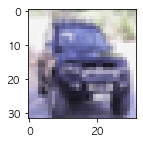

In [91]:
width = 32
height = 32
channel = 3

plt.rcParams["figure.figsize"] = (2 , 2)

for i in range(10):
    output = model.predict(test_images[i].reshape(1, width , height , channel ))
    plt.imshow(test_images[i].reshape(width , height , channel))
    print("예측 : " + class_names[np.argmax(output)] +  "/ 정답 : " + class_names[np.argmax(test_labels[i])])
    plt.show()

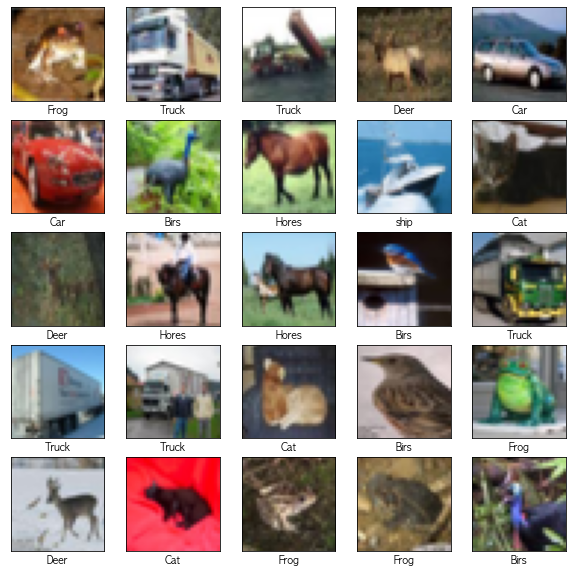

313/313 [==============================] - 2s 7ms/step - loss: 2.3026 - accuracy: 0.1000

Loss : 2.302638053894043 , Acc : 0.10000000149011612


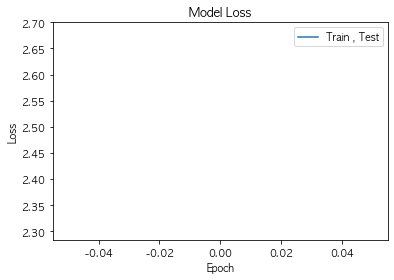

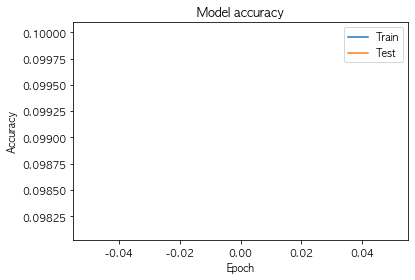

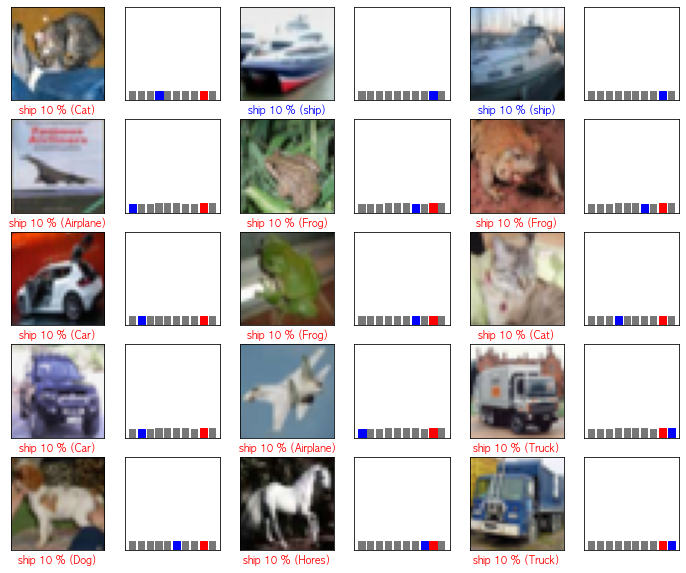

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import keras 
import os 
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets
from tensorflow.keras import utils
from matplotlib import rc 
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False


cifar_mnist = datasets.cifar10

(train_images , train_labels) , (test_images , test_labels) = cifar_mnist.load_data()

class_names = ["Airplane" , "Car" , "Birs" , "Cat" , "Deer" , "Dog" , "Frog" , "Hores" ,"ship" , "Truck"]

plt.figure(figsize = (10 , 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i] , cmap = plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

num_classes = 10
train_images = train_images.astype("float32")
trian_images = train_images / 255
test_images = test_images.astype("float32")
test_images = test_images / 255
train_labels = utils.to_categorical(train_labels , num_classes)
test_labels = utils.to_categorical(test_labels , num_classes)

model = keras.Sequential([
    Conv2D(32 , kernel_size = (3 , 3) , padding = "same" , input_shape = train_images.shape[1:],
          activation = tf.nn.relu),
    MaxPooling2D(pool_size = (2 , 2)),
    Dropout(0.25),
    Conv2D(64 , kernel_size = (3 , 3) , padding = "same" , activation = tf.nn.relu),
    MaxPooling2D(pool_size = (2 , 2)),
    Dropout(0.25),
    Flatten(),
    Dense(64 , activation = tf.nn.relu),
    Dropout(0.25),
    Dense(num_classes , activation = tf.nn.softmax)
])
# model.summary()

model.compile(
    loss = "categorical_crossentropy" , 
    optimizer = "adam",
    metrics = ["accuracy"]
)

epochs = 1
batch_size = 64
early_stopping = EarlyStopping(monitor = "val_loss" , patience = 10)
history = model.fit(
    train_images , train_labels,
    epochs = epochs,
    validation_data = (test_images , test_labels),
    shuffle = True,
    callbacks = [early_stopping]
)

loss , acc = model.evaluate(test_images , test_labels)
print("\nLoss : {} , Acc : {}".format(loss , acc))


def plt_show_loss(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train , Test"] , loc = 0)

def plt_show_acc(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train" , "Test"] , loc = 0)
plt_show_loss(history)
plt.show()
plt_show_acc(history)
plt.show()

predictions = model.predict(test_images)

def plot_image(i , predictions_array , true_label , img):
    predictions_array , true_label , img = predictions_array[i] , true_label[i] , img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img , cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = "blue"
    else:
        color = "red"
    plt.xlabel("{} {:2.0f} % ({})".format(class_names[predicted_label] , 
                                          100 * np.max(predictions_array),
                                          class_names[np.argmax(true_label)]),
                                          color = color)
        
def plot_value_array(i , predictions_array , true_label):
    predictions_array  , true_label = predictions_array[i] , true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10) , predictions_array , color = "#777777")
    plt.ylim([0 , 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[np.argmax(true_label)].set_color("blue")
    
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols , 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows , 2 * num_cols , 2 * i + 1)
    plot_image(i , predictions , test_labels , test_images)
    plt.subplot(num_rows , 2 * num_cols , 2 * i + 2)
    plot_value_array(i , predictions , test_labels)
plt.show()

In [3]:
# 너무나 유명한 개 , 고양이 

import tensorflow as tf 
import matplotlib.pyplot as plt
import keras 
import os 
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets
from tensorflow.keras import utils
from matplotlib import rc 
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

from tensorflow.keras.preprocessing.image import ImageDataGenerator , array_to_img , img_to_array , load_img

datagen = ImageDataGenerator(
    # 이미지의 최대 회전각을 지정(최대 20도 까지 회전)
    rotation_range = 40 , 
    # 이미지의 이동을 의미 , 좌우 위아래로 이미지 이동 
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    shear_range = 0.2 ,
    zoom_range = 0.2 ,
    horizontal_flip = True ,
    fill_mode = "nearest")

img = load_img("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/dogs-vs-cats/train/cat/cat.1.jpg")
x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x , batch_size = 1 , save_to_dir = "/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/preview",
                         save_prefix = "cat" , save_format = "jpeg"):
    i += 1
    if i > 24:
        break

In [2]:
import os 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.preprocessing import image
import keras 
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets
from tensorflow.keras import utils
from matplotlib import rc 
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False


rootPath = "/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/dogs-vs-cats"

imageGenerator = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    brightness_range = [.2 , .2],
    horizontal_flip = True,
    validation_split = 0.2,
    fill_mode = "nearest"
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath , "train"),
    target_size = (128 , 128),
    class_mode = "binary",
    subset = "training"
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath , "train"),
    target_size = (128 , 128),
    class_mode = "binary",
    subset = "validation"
)


model = Sequential()
model.add(Conv2D(64 , kernel_size = (3 , 3) , input_shape = (128 , 128 , 3) , activation = "relu"))
model.add(Conv2D(64 , (3 , 3) ,activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128 , activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10 , activation = "softmax"))
model.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
history = model.fit(trainGen , validation_data = validationGen , epochs = 3 , batch_size = 1000 , verbose = 1)


print("\nAccuracy : " , model.evaluate(validationGen))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/3
625/625 [==============================] - 369s 589ms/step - loss: 0.7096 - accuracy: 0.5329 - val_loss: 0.6804 - val_accuracy: 0.5852
Epoch 2/3
625/625 [==============================] - 368s 589ms/step - loss: 0.6833 - accuracy: 0.5575 - val_loss: 0.6660 - val_accuracy: 0.5944
Epoch 3/3
157/157 [==============================] - 55s 352ms/step - loss: 0.6395 - accuracy: 0.6262

Accuracy :  [0.6395120620727539, 0.6262000203132629]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

/Users/panhong/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


고양이 : 예측 = 고양이
고양이 : 예측 = 개
고양이 : 예측 = 고양이
고양이 : 예측 = 개
고양이 : 예측 = 고양이
고양이 : 예측 = 고양이
고양이 : 예측 = 고양이
고양이 : 예측 = 고양이
개 : 예측 = 개
개 : 예측 = 고양이 
개 : 예측 = 고양이 
개 : 예측 = 개
개 : 예측 = 개
개 : 예측 = 개
개 : 예측 = 개
개 : 예측 = 개
개 : 예측 = 개
개 : 예측 = 개


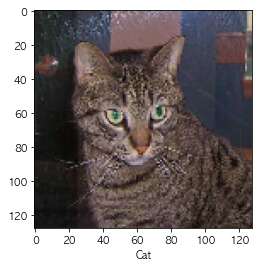

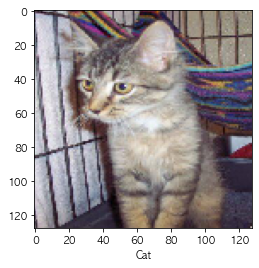

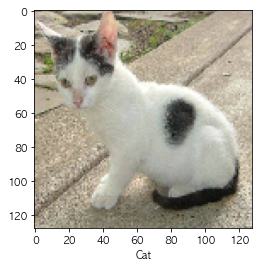

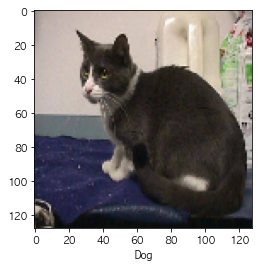

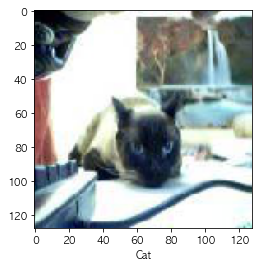

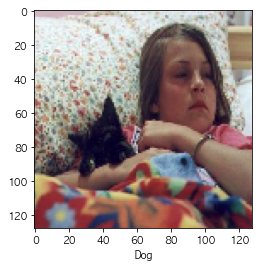

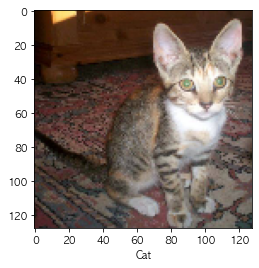

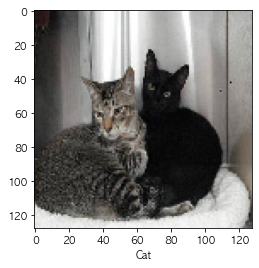

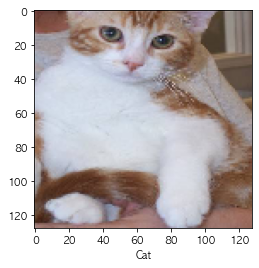

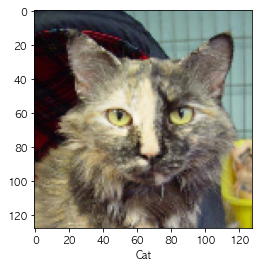

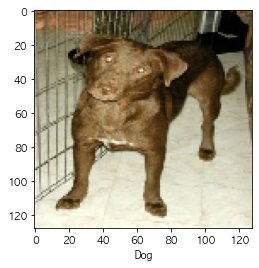

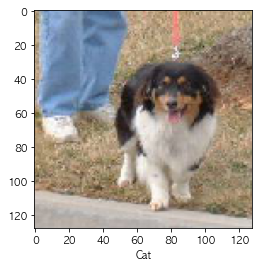

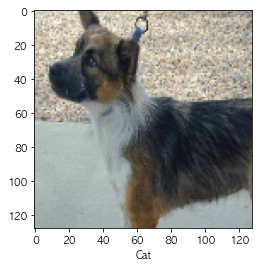

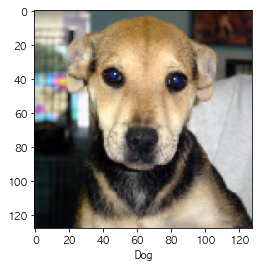

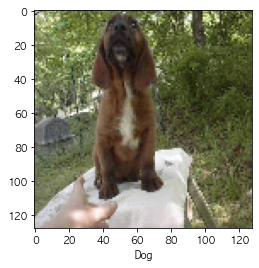

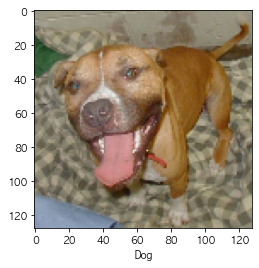

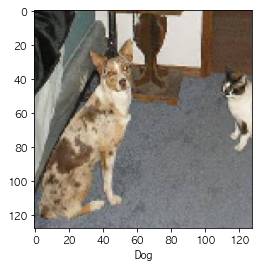

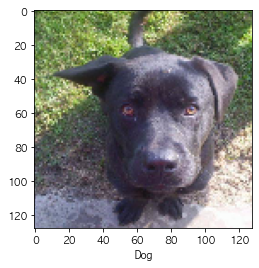

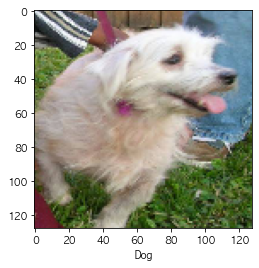

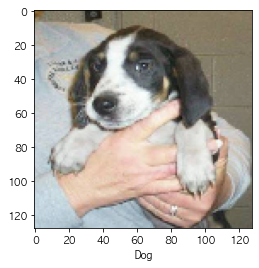

In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

model = load_model("/Users/panhong/Desktop/74-0.1881-0.9234.hdf5")
model.summary()

cls_index = ["고양이" , "개"]

n = 20
test_num = [[0] * n for _ in range(n)]

for i in range(10):
    f_name = "cat." + str(i + 1)
    file_path = "/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/dogs-vs-cats/train/cat/" + f_name + ".jpg"
    print(file_path)
    test_num[i] = image.load_img(file_path , target_size = (128 ,128))
for i in range(10 , 20):
    f_name = "dog." + str(i - 9)
    file_path = "/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/dogs-vs-cats/train/dog/" + f_name + ".jpg"
    print(file_path)
    test_num[i] = image.load_img(file_path , target_size = (128 ,128))

for i in range(20):
    plt.figure()
    plt.imshow(test_num[i])
    
    test_num[i] = image.img_to_array(test_num[i])
    test_num[i] = np.expand_dims(test_num[i] , axis = 0)
    result = model.predict_classes(test_num[i])
    
    if result == 0:
        strName = "Cat"
    else:
        strName = "Dog"
    plt.xlabel(strName)
    
    if i < 10:
        if result == 0:
            print("고양이 : 예측 = 고양이")
        else:
            print("고양이 : 예측 = 개")
            
    else:
        if result == 0:
            print("개 : 예측 = 고양이 ")
        
        else:
            print("개 : 예측 = 개")